In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = 'G:/My Drive/Data science/Multiclass_Fish_Image_Classification/data/train'
val_dir = 'G:/My Drive/Data science/Multiclass_Fish_Image_Classification/data/val'
test_dir = 'G:/My Drive/Data science/Multiclass_Fish_Image_Classification/data/test'

In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',             
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4984 images belonging to 11 classes.
Found 1241 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


animal fish: 877 images
animal fish bass: 24 images
fish sea_food black_sea_sprat: 456 images
fish sea_food gilt_head_bream: 453 images
fish sea_food hourse_mackerel: 459 images
fish sea_food red_mullet: 464 images
fish sea_food red_sea_bream: 457 images
fish sea_food sea_bass: 431 images
fish sea_food shrimp: 461 images
fish sea_food striped_red_mullet: 438 images
fish sea_food trout: 464 images


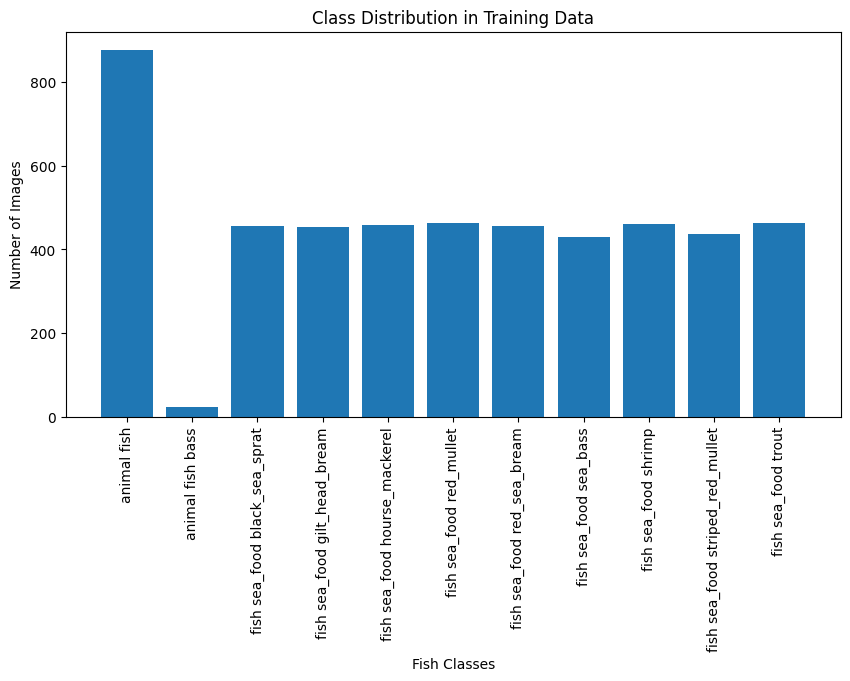

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_counts = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

unique, counts = np.unique(class_counts, return_counts=True)
for label, count in zip(unique, counts):
    print(f"{class_labels[label]}: {count} images")

plt.figure(figsize=(10,5))
plt.bar(class_labels, counts)
plt.xticks(rotation=90)
plt.xlabel("Fish Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Data")
plt.show()


In [ ]:
# Identify small classes (example threshold <50)
small_classes = [label for label, count in zip(unique, counts) if count < 50]
print("Small classes:", [class_labels[i] for i in small_classes])


Small classes: ['animal fish bass']


In [ ]:
# Define Custom CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


g:\My Drive\Data science\Multiclass_Fish_Image_Classification\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#Model CNN 
import scipy

epochs = 20

history = model.fit(
    train_generator,     
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,   
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs 
)



model.save('Custom CNN/custom_cnn_model.h5')
model.save('Custom CNN/custom_cnn_model.keras')

cnn_loss, cnn_acc = model.evaluate(validation_generator)
print(f"Custom CNN Accuracy: {cnn_acc*100:.2f}%")

In [ ]:
# Model VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False

model_vgg.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('VGG16_best.keras', monitor='val_accuracy', save_best_only=True)

history_vgg = model_vgg.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stop, checkpoint]
)

model_vgg.save('VGG16_final.h5')

model_vgg.save('VGG16_final.keras')

loss, acc = model_vgg.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2651s 17s/step - accuracy: 0.2490 - loss: 2.1478 - val_accuracy: 0.5939 - val_loss: 1.6077
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2501s 16s/step - accuracy: 0.5409 - loss: 1.3804 - val_accuracy: 0.7599 - val_loss: 0.9574
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2486s 16s/step - accuracy: 0.7245 - loss: 0.8818 - val_accuracy: 0.8904 - val_loss: 0.5442
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2495s 16s/step - accuracy: 0.8140 - loss: 0.6162 - val_accuracy: 0.9218 - val_loss: 0.3728
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 2484s 16s/step - accuracy: 0.8678 - loss: 0.4554 - val_accuracy: 0.9315 - val_loss: 0.2841


39/39 ━━━━━━━━━━━━━━━━━━━━ 450s 11s/step - accuracy: 0.9275 - loss: 0.2775
Validation Accuracy: 92.75%


In [ ]:
# Model ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ResNet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = ResNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=ResNet_base.input, outputs=output)

for layer in ResNet_base.layers[:-10]:
    layer.trainable = False

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('ResNet50_best.keras', monitor='val_accuracy', save_best_only=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_resnet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_resnet.save('ResNet50_final.keras')
model_resnet.save('ResNet50_final.h5')


g:\My Drive\Data science\Multiclass_Fish_Image_Classification\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1200 - loss: 2.5725

g:\My Drive\Data science\Multiclass_Fish_Image_Classification\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 1317s 8s/step - accuracy: 0.1585 - loss: 2.3805 - val_accuracy: 0.1531 - val_loss: 2.3509
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 940s 6s/step - accuracy: 0.2432 - loss: 2.1074 - val_accuracy: 0.1821 - val_loss: 2.1963
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1045s 7s/step - accuracy: 0.2909 - loss: 1.9953 - val_accuracy: 0.2981 - val_loss: 1.9557
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 946s 6s/step - accuracy: 0.3180 - loss: 1.9208 - val_accuracy: 0.3844 - val_loss: 1.8528
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 922s 6s/step - accuracy: 0.3397 - loss: 1.8635 - val_accuracy: 0.4110 - val_loss: 1.7757
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 909s 6s/step - accuracy: 0.3630 - loss: 1.8097 - val_accuracy: 0.3932 - val_loss: 1.7864
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 912s 6s/step - accuracy: 0.3706 - loss: 1.7801 - val_accuracy: 0.3981 - val_loss: 1.7630
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 923s 6s/step - accuracy: 0.4013 - loss: 1.7294 - val_accuracy: 0.4

In [ ]:
# Model MobileNet
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

MobileNet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = MobileNet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=MobileNet_base.input, outputs=output)

for layer in MobileNet_base.layers[:-8]:
    layer.trainable = False

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('MobileNet_best.keras', monitor='val_accuracy', save_best_only=True)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_mobilenet.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_mobilenet.save('MobileNet_final.keras')
model_mobilenet.save('MobileNet_final.h5')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


g:\My Drive\Data science\Multiclass_Fish_Image_Classification\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1316 - loss: 2.7205

g:\My Drive\Data science\Multiclass_Fish_Image_Classification\tf_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.1932 - loss: 2.4089 - val_accuracy: 0.4593 - val_loss: 1.6743
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.4500 - loss: 1.6397 - val_accuracy: 0.6882 - val_loss: 1.1912
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5991 - loss: 1.2558 - val_accuracy: 0.8195 - val_loss: 0.8788
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7008 - loss: 1.0124 - val_accuracy: 0.8856 - val_loss: 0.6705
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.7500 - loss: 0.8539 - val_accuracy: 0.9073 - val_loss: 0.5293
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.7963 - loss: 0.7042 - val_accuracy: 0.9291 - val_loss: 0.4315
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8216 - loss: 0.6191 - val_accuracy: 0.9339 - val_loss: 0.3684
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8577 - loss: 0.5252 - val_accuracy: 0.946

In [ ]:
# Model InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = Inception_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=Inception_base.input, outputs=output)

for layer in Inception_base.layers[:-20]:
    layer.trainable = False

model_inception.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('InceptionV3_best.keras', monitor='val_accuracy', save_best_only=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_inception.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_inception.save('InceptionV3_final.keras')
model_inception.save('InceptionV3_final.h5')


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 601s 4s/step - accuracy: 0.3200 - loss: 2.0240 - val_accuracy: 0.6922 - val_loss: 1.4109
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 617s 4s/step - accuracy: 0.6533 - loss: 1.3018 - val_accuracy: 0.8316 - val_loss: 0.9104
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.7594 - loss: 0.9399 - val_accuracy: 0.8840 - val_loss: 0.6579
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 567s 4s/step - accuracy: 0.8140 - loss: 0.7254 - val_accuracy: 0.9122 - val_loss: 0.4936
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 571s 4s/step - accuracy: 0.8600 - loss: 0.5836 - val_accuracy: 0.9226 - val_loss: 0.4150
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 577s 4s/step - accuracy: 0.8698 - loss: 0.5119 - val_accuracy: 0.9275 - val_loss: 0.3490
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 582s 4s/step - accuracy: 0.8852 - loss: 0.4427 - val_accuracy: 0.9347 - val_loss: 0.3091
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 619s 4

In [ ]:
# Model EfficientNetV2B0
import scipy
from tensorflow.keras.applications import EfficientNetV2B0 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

effnet_v2_base = EfficientNetV2B0(
    weights='imagenet',       
    include_top=False,        
    input_shape=(224, 224, 3) 
)

x = effnet_v2_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_effnet_v2 = Model(inputs=effnet_v2_base.input, outputs=output)

for layer in effnet_v2_base.layers[:-20]:
    layer.trainable = False

model_effnet_v2.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('EfficientNetV2B0_best.keras', monitor='val_accuracy', save_best_only=True)

history_effnet_v2 = model_effnet_v2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

loss, acc = model_effnet_v2.evaluate(validation_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

model_effnet_v2.save('EfficientNetV2B0_final.keras')
model_effnet_v2.save('EfficientNetV2B0_final.h5')


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.0999 - loss: 2.4148 - val_accuracy: 0.0943 - val_loss: 2.3663
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.1364 - loss: 2.3721 - val_accuracy: 0.1765 - val_loss: 2.3400
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.1439 - loss: 2.3612 - val_accuracy: 0.1765 - val_loss: 2.3241
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.1591 - loss: 2.3408 - val_accuracy: 0.1765 - val_loss: 2.3152
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.1595 - loss: 2.3385 - val_accuracy: 0.1765 - val_loss: 2.3086
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.1659 - loss: 2.3344 - val_accuracy: 0.1765 - val_loss: 2.3044
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.1617 - loss: 2.3319 - val_accuracy: 0.1765 - val_loss: 2.3006
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 343s 2

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("Custom CNN/custom_cnn_model.keras")                
model_vgg = load_model("VGG16_final.keras")                            
model_resnet = load_model("ResNet50_final.keras")                      
model_mobilenet = load_model("MobileNet_final.keras")                  
model_inception = load_model("InceptionV3_final.keras")                
model_effnet_v2 = load_model("EfficientNetV2B0_final.keras")           

cnn_loss, cnn_accuracy = model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

vgg_loss, vgg_accuracy = model_vgg.evaluate(test_generator)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

resnet_loss, resnet_accuracy = model_resnet.evaluate(test_generator)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

inception_loss, inception_accuracy = model_inception.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

efficient_loss, efficient_accuracy = model_effnet_v2.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 983ms/step - accuracy: 0.8648 - loss: 0.4350
Custom CNN Accuracy: 0.8648
100/100 ━━━━━━━━━━━━━━━━━━━━ 1178s 12s/step - accuracy: 0.9542 - loss: 0.2103
VGG16 Accuracy: 0.9542
100/100 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.5682 - loss: 1.4308
ResNet50 Accuracy: 0.5682
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9752 - loss: 0.1708
MobileNet Accuracy: 0.9752
100/100 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.9721 - loss: 0.1620
InceptionV3 Accuracy: 0.9721
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.1632 - loss: 2.3017
EfficientNetB0 Accuracy: 0.1632


In [ ]:
# Essential Imports
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Custom CNN
test_generator.reset()
cnn_prob = model.predict(test_generator, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("=== Custom CNN ===")
print(classification_report(test_generator.classes, cnn_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== Custom CNN ===
                                  precision    recall  f1-score   support

                     animal fish     0.9773    0.9923    0.9847       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.7474    0.9732    0.8455       298
   fish sea_food gilt_head_bream     0.8465    0.5607    0.6746       305
   fish sea_food hourse_mackerel     0.8557    0.8916    0.8733       286
        fish sea_food red_mullet     0.9966    0.9966    0.9966       291
     fish sea_food red_sea_bream     0.9704    0.6007    0.7421       273
          fish sea_food sea_bass     0.6458    0.9144    0.7570       327
            fish sea_food shrimp     1.0000    0.8616    0.9257       289
fish sea_food striped_red_mullet     0.9059    0.7884    0.8431       293
             fish sea_food trout     0.8459    0.9966    0.9151       292

                        accuracy                         0.8648      3187
                 

In [ ]:
# VGG16
test_generator.reset()
vgg_prob = model_vgg.predict(test_generator, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("=== VGG16 ===")
print(classification_report(test_generator.classes, vgg_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== VGG16 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9771    0.9865    0.9818       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9425    0.9899    0.9656       298
   fish sea_food gilt_head_bream     0.9774    0.9934    0.9854       305
   fish sea_food hourse_mackerel     0.9656    0.9825    0.9740       286
        fish sea_food red_mullet     0.7826    0.9897    0.8741       291
     fish sea_food red_sea_bream     0.9889    0.9817    0.9853       273
          fish sea_food sea_bass     0.9968    0.9664    0.9814       327
            fish sea_food shrimp     0.9697    0.9965    0.9829       289
fish sea_food striped_red_mullet     0.9802    0.6758    0.8000       293
             fish sea_food trout     0.9966    0.9966    0.9966       292

                        accuracy                         0.9542      3187
                      

In [ ]:
# ResNet50
test_generator.reset()
resnet_prob = model_resnet.predict(test_generator, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("=== ResNet50 ===")
print(classification_report(test_generator.classes, resnet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== ResNet50 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9456    0.6019    0.7356       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.5719    0.5470    0.5592       298
   fish sea_food gilt_head_bream     0.5249    0.3803    0.4411       305
   fish sea_food hourse_mackerel     0.5037    0.7168    0.5916       286
        fish sea_food red_mullet     0.6331    0.3677    0.4652       291
     fish sea_food red_sea_bream     0.4989    0.7949    0.6130       273
          fish sea_food sea_bass     0.3595    0.6728    0.4686       327
            fish sea_food shrimp     0.6451    0.7232    0.6819       289
fish sea_food striped_red_mullet     0.5657    0.1911    0.2857       293
             fish sea_food trout     0.6743    0.7021    0.6879       292

                        accuracy                         0.5682      3187
                   

In [ ]:
# MobileNet
test_generator.reset()
mobilenet_prob = model_mobilenet.predict(test_generator, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("=== MobileNet ===")
print(classification_report(test_generator.classes, mobilenet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== MobileNet ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    0.9981    0.9867       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9637    0.9799    0.9717       298
   fish sea_food gilt_head_bream     0.9934    0.9934    0.9934       305
   fish sea_food hourse_mackerel     0.9722    0.9790    0.9756       286
        fish sea_food red_mullet     0.9236    0.9553    0.9392       291
     fish sea_food red_sea_bream     0.9927    0.9963    0.9945       273
          fish sea_food sea_bass     1.0000    0.9725    0.9860       327
            fish sea_food shrimp     0.9931    1.0000    0.9966       289
fish sea_food striped_red_mullet     0.9431    0.9044    0.9233       293
             fish sea_food trout     0.9932    1.0000    0.9966       292

                        accuracy                         0.9752      3187
                  

In [ ]:
# InceptionV3
test_generator.reset()
inception_prob = model_inception.predict(test_generator, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_generator.classes, inception_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9716    0.9865    0.9790       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9832    0.9832    0.9832       298
   fish sea_food gilt_head_bream     0.9436    0.9869    0.9647       305
   fish sea_food hourse_mackerel     0.9722    0.9790    0.9756       286
        fish sea_food red_mullet     0.9622    0.9622    0.9622       291
     fish sea_food red_sea_bream     0.9888    0.9707    0.9797       273
          fish sea_food sea_bass     0.9695    0.9725    0.9710       327
            fish sea_food shrimp     1.0000    0.9965    0.9983       289
fish sea_food striped_red_mullet     0.9446    0.9317    0.9381       293
             fish sea_food trout     0.9897    0.9829    0.9863       292

                        accuracy                         0.9721      3187
                

In [ ]:
# EfficientNetB0
test_generator.reset()
efficient_prob = model_effnet_v2.predict(test_generator, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("=== EfficientNetB0 ===")
print(classification_report(test_generator.classes, efficient_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== EfficientNetB0 ===
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
             

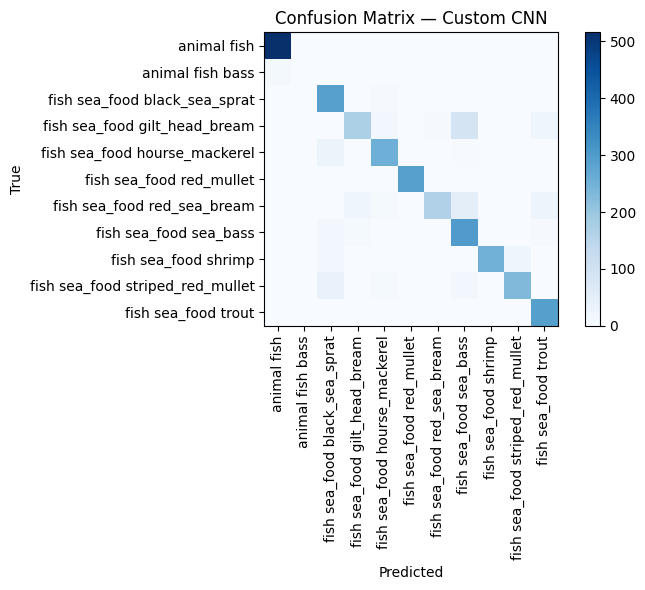

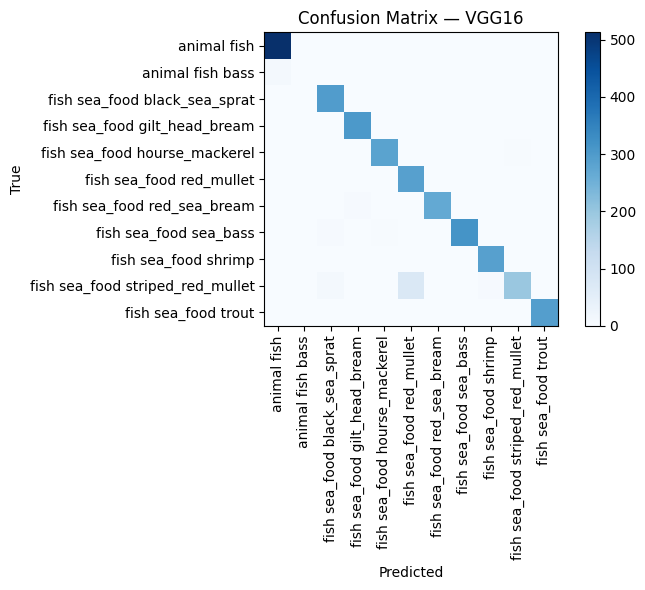

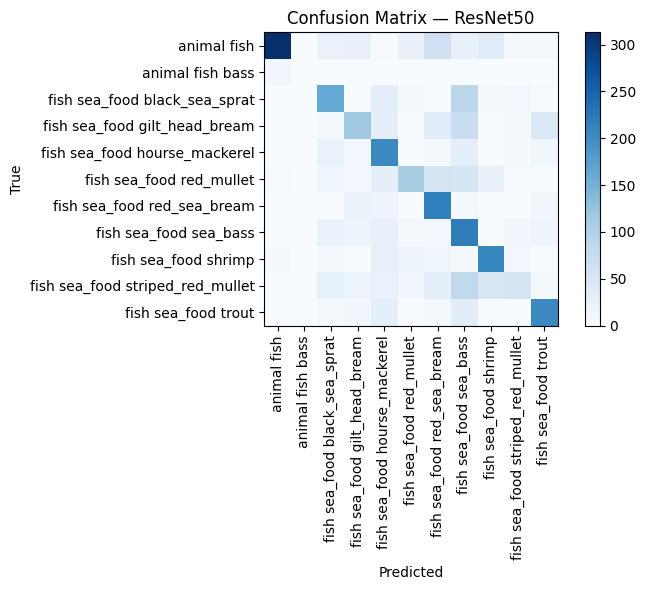

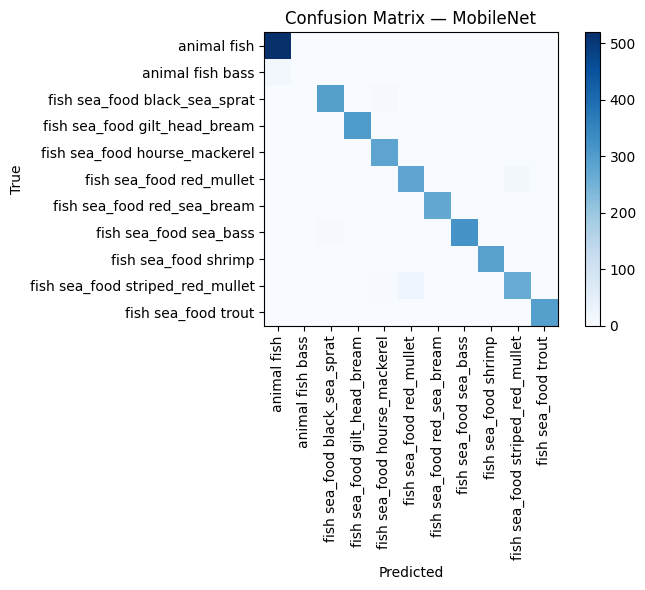

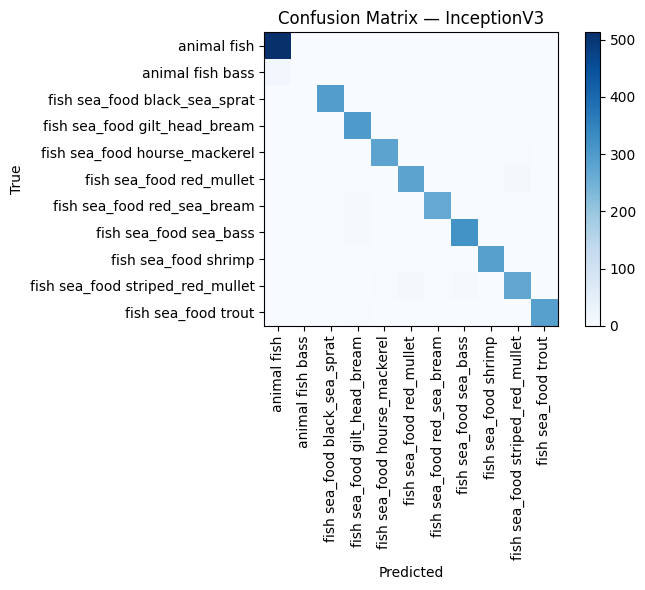

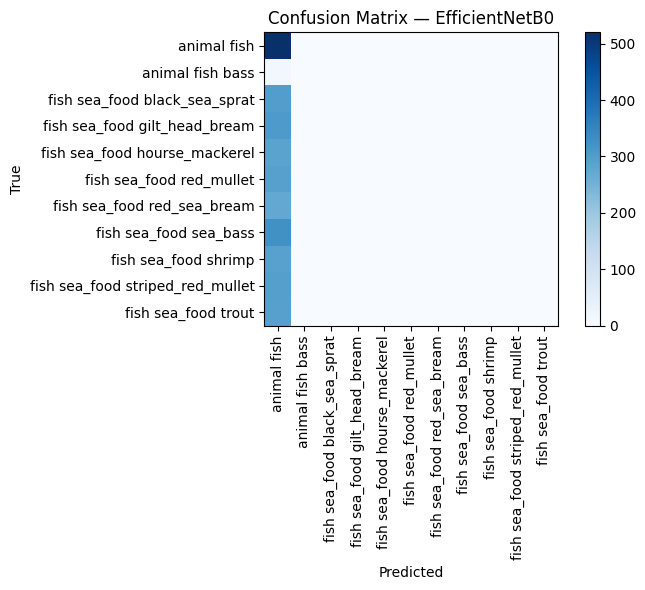

In [ ]:
# Essential Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

class_names = list(test_generator.class_indices.keys())
y_true = test_generator.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")
